In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("fake_job_postings.csv")

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

In [5]:
print(df.isnull().sum())

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [6]:
df['location'] = df['location'].fillna('unknown')

In [7]:
df['department'] = df['department'].fillna('unknown')
df['salary_range'] = df['salary_range'].fillna('unknown')
df['employment_type'] = df['employment_type'].fillna('Not Specified')
df['required_experience'] = df['required_experience']. fillna('Not Specified')
df['required_education'] = df['required_education']. fillna('Not Specified')
df['industry'] = df['industry']. fillna('Not Specified')
df['function'] = df['function']. fillna('Not Specified')

In [8]:
print(df.isnull().sum())

job_id                    0
title                     0
location                  0
department                0
salary_range              0
company_profile        3308
description               1
requirements           2696
benefits               7212
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry                  0
function                  0
fraudulent                0
dtype: int64


In [9]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df[text_columns] = df[text_columns].fillna(' ')

In [10]:
print(df.isnull().sum())

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


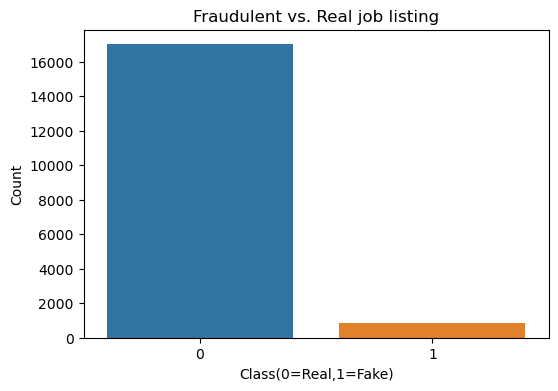

In [11]:
plt.figure(figsize =(6,4))
sns.countplot(x = 'fraudulent', data = df)
plt.title('Fraudulent vs. Real job listing')
plt.xlabel('Class(0=Real,1=Fake)')
plt.ylabel('Count')
plt.show()



In [12]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [13]:
!pip install wordcloud

In [14]:
!pip install -U spacy

In [15]:
pip install --upgrade scikit-learn


In [16]:
import re
import string
import random

# Text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Machine learning pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Word Cloud
from wordcloud import WordCloud

# NLP processing with spaCy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English


In [17]:
print(df[df['required_experience'] == 'Not Specified']['fraudulent'].value_counts(normalize=True))


fraudulent
0    0.938298
1    0.061702
Name: proportion, dtype: float64


In [18]:
df.groupby('required_experience')['fraudulent'].value_counts(normalize=True)


required_experience  fraudulent
Associate            0             0.981715
                     1             0.018285
Director             0             0.956298
                     1             0.043702
Entry level          0             0.933630
                     1             0.066370
Executive            0             0.929078
                     1             0.070922
Internship           0             0.973753
                     1             0.026247
Mid-Senior level     0             0.970333
                     1             0.029667
Not Applicable       0             0.946237
                     1             0.053763
Not Specified        0             0.938298
                     1             0.061702
Name: proportion, dtype: float64

In [19]:
df = df[df['required_experience'] != 'Not Specified']

In [20]:
print(df['required_experience'].unique()) 


['Internship' 'Not Applicable' 'Mid-Senior level' 'Associate'
 'Entry level' 'Executive' 'Director']


In [21]:
def split(location):
    l = location.split(',')
    return l[0]
df['country']= df.location.apply(split)

In [22]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0,NZ
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",unknown,unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,DE


In [23]:

countr = dict(df['country'].value_counts()[:14])


if '' in countr:
    del countr['']


print(countr)


{'US': 6372, 'GB': 1603, 'GR': 582, 'NZ': 251, 'CA': 241, 'DE': 229, 'IN': 195, 'AU': 127, 'BE': 96, 'unknown': 93, 'IE': 76, 'NL': 73, 'HK': 71, 'PH': 63}


In [24]:

if 'unknown' in countr:
    del countr['unknown']


print(countr)


{'US': 6372, 'GB': 1603, 'GR': 582, 'NZ': 251, 'CA': 241, 'DE': 229, 'IN': 195, 'AU': 127, 'BE': 96, 'IE': 76, 'NL': 73, 'HK': 71, 'PH': 63}


Text(0.5, 0, 'Countries')

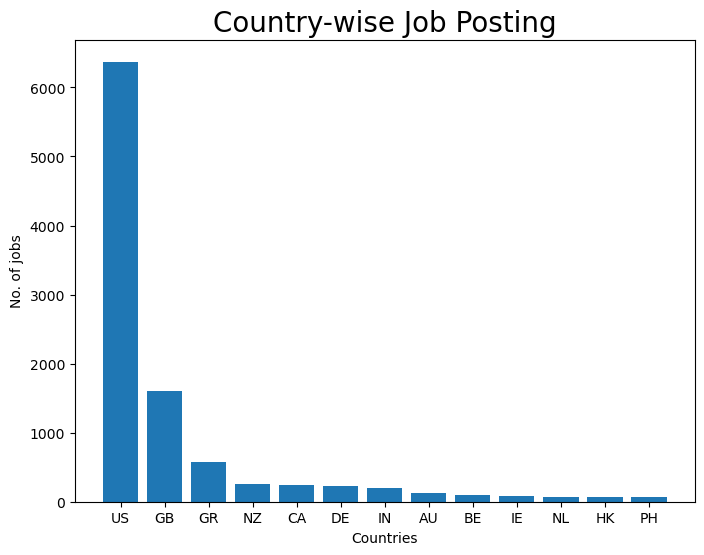

In [25]:
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size = 20)
plt.bar(countr.keys(),countr.values())
plt.ylabel('No. of jobs',size = 10)
plt.xlabel('Countries',size = 10)

In [26]:
edu=dict(df.required_education.value_counts()[:7])
if '' in edu:
    del edu['']

print(edu)

{"Bachelor's Degree": 4212, 'Not Specified': 2319, 'High School or equivalent': 1972, 'Unspecified': 1327, "Master's Degree": 332, 'Associate Degree': 250, 'Certification': 146}


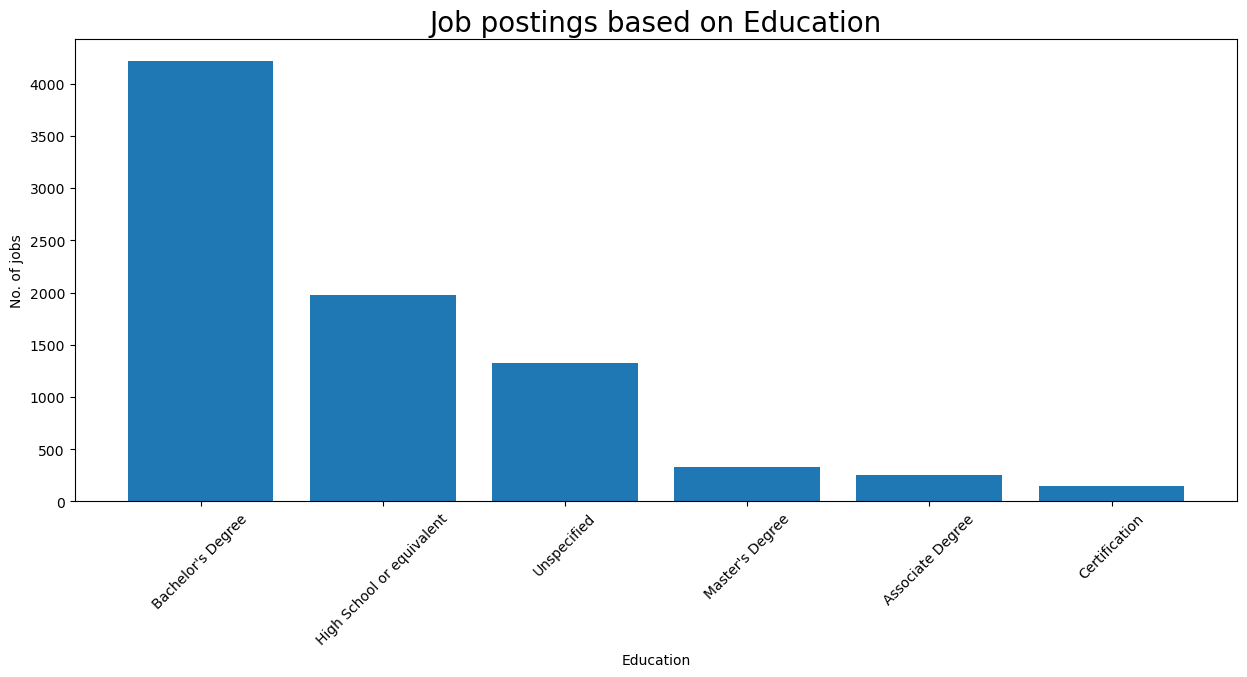

In [27]:
import matplotlib.pyplot as plt


edu.pop("Not Specified", None)  


plt.figure(figsize=(15,6))


plt.bar(edu.keys(), edu.values())


plt.title('Job postings based on Education', fontsize=20)
plt.ylabel('No. of jobs', fontsize=10)
plt.xlabel('Education', fontsize=10)


plt.xticks(rotation=45)


plt.show()


In [28]:
print(df[df['fraudulent'] == 0]['title'].value_counts()[:10])


title
Graduates: English Teacher Abroad (Conversational)    144
Customer Service Associate                            142
Customer Service Associate - Part Time                 76
Account Manager                                        54
Software Engineer                                      44
Customer Service Associate                             42
Web Developer                                          40
Customer Service Team Lead                             40
English Teacher Abroad (Conversational)                39
Project Manager                                        39
Name: count, dtype: int64


In [29]:
print(df[df['fraudulent'] == 1]['title'].value_counts()[:10])

title
Customer Service Representative                               17
Administrative Assistant                                      12
Network Marketing                                              9
Account Sales Managers $80-$130,000/yr                         9
Payroll Clerk                                                  9
 Payroll Data Entry Clerk Position - Earn $100-$200 Daily      6
Data Entry                                                     6
Agency Sales Managers $150-$175,000/yr                         6
Executive Chef                                                 4
Call Center Representative I                                   4
Name: count, dtype: int64


In [30]:
df['text']=df['title']+df['company_profile']+df['description']+df['requirements']+df['benefits']
del df['title']
del df['location']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [31]:
df.head()

,job_id,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,fraudulent,text
0,1,Marketing,unknown,0,1,0,Other,0,"Marketing InternWe're Food52, and we've create..."
1,2,Success,unknown,0,1,0,Full-time,0,Customer Service - Cloud Video Production90 Se...
3,4,Sales,unknown,0,1,0,Full-time,0,Account Executive - Washington DCOur passion f...
4,5,unknown,unknown,0,1,1,Full-time,0,Bill Review ManagerSpotSource Solutions LLC is...
6,7,ANDROIDPIT,20000-28000,0,1,1,Full-time,0,"Head of Content (m/f)Founded in 2009, the Fonp..."


In [32]:
fraudjobs_text = df[df.fraudulent==1].text
realjobs_text = df[df.fraudulent==0].text

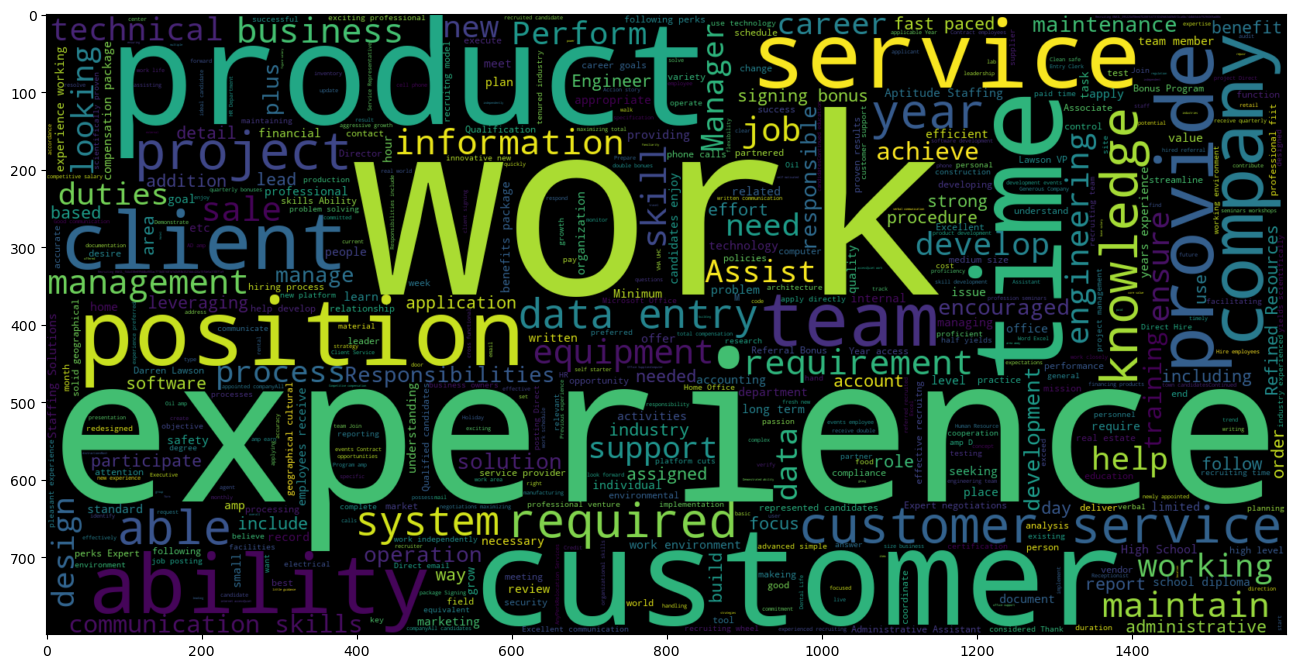

In [33]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,max_words = 3000, width = 1600, height = 800 , stopwords = STOPWORDS).generate(str("".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

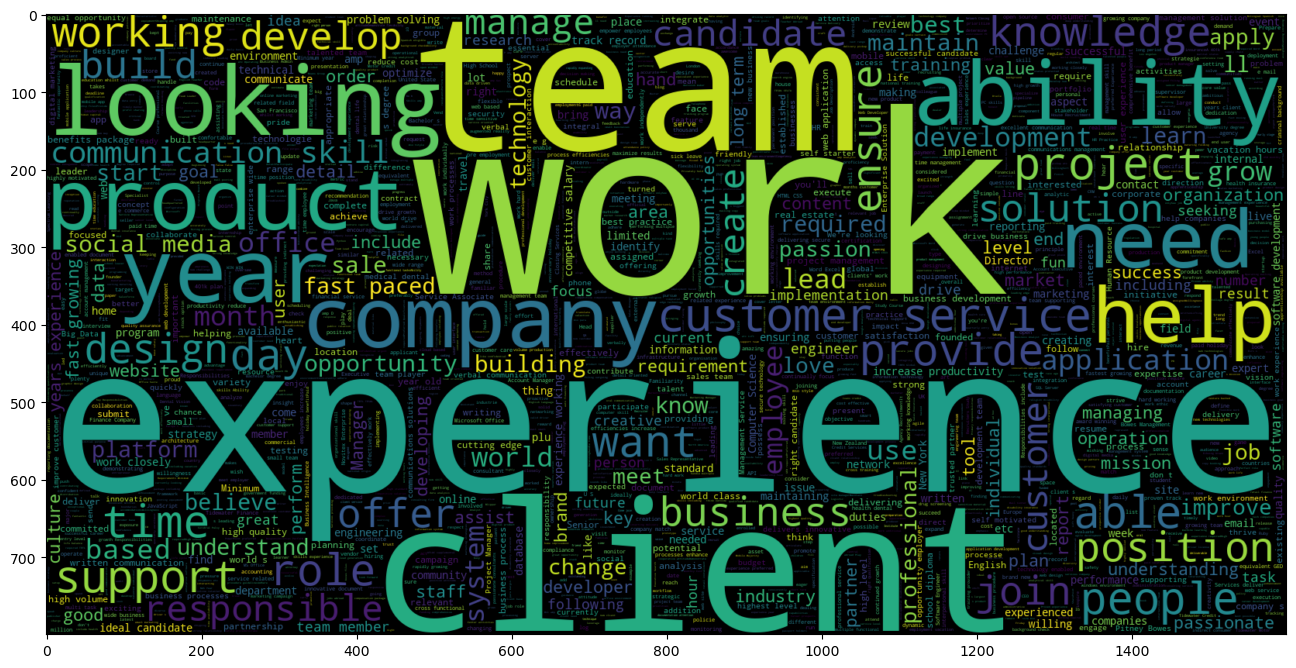

In [34]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,max_words = 3000, width = 1600, height = 800 , stopwords = STOPWORDS).generate(str("".join(realjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [35]:
!pip install spacy && python -m spacy download en

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 585.1 kB/s eta 0:00:22
     - -------------------------------------- 0.5/12.8 MB 2.7 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 6.8 MB/s eta 0:00:02
     ---------- ----------------------------- 3.3/12.8 MB 11.7 MB/s eta 0:00:01
     ------------- -------------------------- 4.4/12.8 MB 14.0 MB/s eta 0:00:01
     ------------------- -------------------- 6.3/12.8 MB 16.8 MB/s eta 0:00:01
     ---------------------- ----------------- 7.3/12.8 MB 17.3 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 19.0 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.8 MB 29.8 MB/s eta 0:00:01
     ----------------------------------- --- 11.7/12.8 MB 

In [36]:

nlp = spacy.load("en_core_web_sm")  
parser = English()
punctuation = string.punctuation
stop_words = STOP_WORDS


def spacy_tokenizer(sentence):
    mytoken = parser(sentence)  
    
    
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytoken]
    
    
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuation]
    
    return mytokens  


class Predictors(TransformerMixin):  
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return []


def clean_text(text):
    return text.strip().lower()


In [37]:
df['text'] = df['text'].apply(clean_text)

In [38]:

# Initialize TF-IDF Vectorizer
cv = TfidfVectorizer(max_features=100)

# Ensure 'text' column exists before transformation
if 'text' in df.columns:
    x = cv.fit_transform(df['text'])

    # Convert to DataFrame (use get_feature_names_out for newer Scikit-learn versions)
    df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

    # Drop the original 'text' column
    df.drop(["text"], axis=1, inplace=True)

    # Concatenate transformed text data with the original dataset
    main_df = pd.concat([df1, df], axis=1)
else:
    print("Column 'text' not found in dataframe!")


In [39]:
main_df.head()

,ability,about,all,amp,an,and,are,as,at,based,...,you,your,job_id,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,fraudulent
0,0.000000,0.041472,0.000000,0.037735,0.000000,0.759326,0.000000,0.076719,0.000000,0.000000,...,0.000000,0.000000,1.0,Marketing,unknown,0.0,1.0,0.0,Other,0.0
1,0.021498,0.093389,0.033899,0.042487,0.028515,0.485244,0.056331,0.057587,0.050735,0.041823,...,0.204963,0.128889,2.0,Success,unknown,0.0,1.0,0.0,Full-time,0.0
2,0.023212,0.000000,0.018301,0.000000,0.092368,0.698586,0.000000,0.031090,0.036520,0.000000,...,0.051071,0.059643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,0.000000,0.066363,0.041589,0.027912,0.610685,0.082709,0.112737,0.000000,0.000000,...,0.030866,0.108139,4.0,Sales,unknown,0.0,1.0,0.0,Full-time,0.0
4,0.000000,0.111502,0.000000,0.101456,0.000000,0.496594,0.067257,0.034378,0.000000,0.000000,...,0.000000,0.175872,5.0,unknown,unknown,0.0,1.0,1.0,Full-time,0.0


In [40]:
Y = main_df.iloc[:,-1]
X = main_df.iloc[:,:-1]

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10554, 107)
(10554,)
(4524, 107)
(4524,)


In [46]:
print(len(X_train.select_dtypes(include=['object']).columns))


0


In [47]:
print(y_train.isnull().sum())  # Shows how many NaNs exist


0


In [48]:
# Drop rows where y_train is NaN
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()


In [50]:
from sklearn.preprocessing import LabelEncoder

# Convert all object (categorical) columns to string type to ensure uniformity
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Fill missing values to prevent errors
X_train.fillna('Unknown', inplace=True)
X_test.fillna('Unknown', inplace=True)

# Apply Label Encoding separately for each categorical column
for col in X_train.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()  # Create a new LabelEncoder for each column
    X_train[col] = encoder.fit_transform(X_train[col])  # Fit and transform X_train
    
    # Create a mapping dictionary for unseen labels in X_test
    class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    
    # Use mapping for faster transformation on X_test and assign -1 for unseen labels
    X_test[col] = X_test[col].map(class_mapping).fillna(-1).astype(int)


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rfc = RandomForestClassifier(
    n_jobs=-1,  # Use all available CPU cores
    oob_score=True,  # Enable out-of-bag score estimation
    n_estimators=100,  # Number of trees
    criterion="entropy",  # Use entropy for information gain
    random_state=42  # Ensure reproducibility
)

# Train the model
model = rfc.fit(X_train, y_train)


In [53]:
model = rfc.fit(X_train, y_train)


In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_jobs=-1,
    oob_score=True,
    n_estimators=100,
    criterion="entropy",
    random_state=42,
    class_weight="balanced"  # Adjusts weights based on class frequencies
)

# Train the model again
model = rfc.fit(X_train, y_train)


In [54]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier with correct parameters
rfc = RandomForestClassifier(
    n_jobs=-1,  # Use all available processors
    oob_score=True,  # Only works when bootstrap=True
    n_estimators=100,  # Number of trees
    criterion="entropy",  # Use entropy for information gain
    random_state=42  # Ensure reproducibility
)

# Check if X_train and y_train are defined
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Fit the model
model = rfc.fit(X_train, y_train)


X_train shape: (7590, 107)
y_train shape: (7590,)


In [61]:
print(X_test)

       ability  about   all   amp    an   and   are    as    at  based  ...  \
11233     1189   1000  2120  1179  2934  3916  3015  2884  2205   1305  ...   
13524     1189   1000  2120  1179  2934  3916  3015  2884  2205   1305  ...   
1047         0      0    -1    -1    -1    -1     0    -1     0     -1  ...   
3250         0     -1    -1     0    -1    -1    -1    -1     0      0  ...   
14506     1189   1000  2120  1179  2934  3916  3015  2884  2205   1305  ...   
...        ...    ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
16183     1189   1000  2120  1179  2934  3916  3015  2884  2205   1305  ...   
716        288      0  2440     0  2158  3753     0  2966   130      0  ...   
17745     1189   1000  2120  1179  2934  3916  3015  2884  2205   1305  ...   
7339        -1      0    -1     0    -1    -1    -1    -1    -1      0  ...   
11776     1189   1000  2120  1179  2934  3916  3015  2884  2205   1305  ...   

       years   you  your  job_id  department  salar

In [62]:
print(y_test.isnull().sum())  # Shows the number of NaN values


0


In [63]:
# Drop NaN values in y_test and corresponding rows in X_test
X_test = X_test[~y_test.isnull()]

y_test = y_test.dropna()


In [64]:
pred = rfc.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.9638888888888889

In [65]:
print("Classification Report\n")
print(classification_report(y_test,pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

Classification Report

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      3123
         1.0       0.00      0.00      0.00       117

    accuracy                           0.96      3240
   macro avg       0.48      0.50      0.49      3240
weighted avg       0.93      0.96      0.95      3240

Confusion Matrix

[[3123    0]
 [ 117    0]]


C:\Users\Alizah Erum\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alizah Erum\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alizah Erum\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
